In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
data = pd.read_excel('/content/50_StartUp.xlsx')
copy_data = data.copy()
copy_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [64]:
copy_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [65]:
copy_data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [66]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [67]:
copy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [68]:
copy_data.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [69]:
the_corelation = copy_data.drop('State', axis=1).corr()
the_corelation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

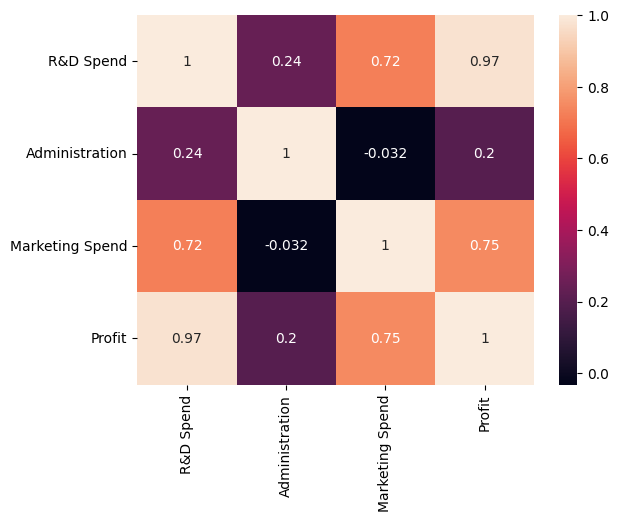

In [70]:
sns.heatmap(the_corelation, annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

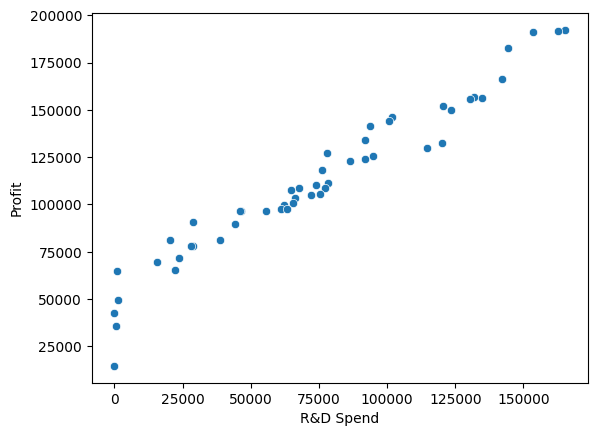

In [71]:
sns.scatterplot(x = 'R&D Spend', y = 'Profit', data = copy_data)

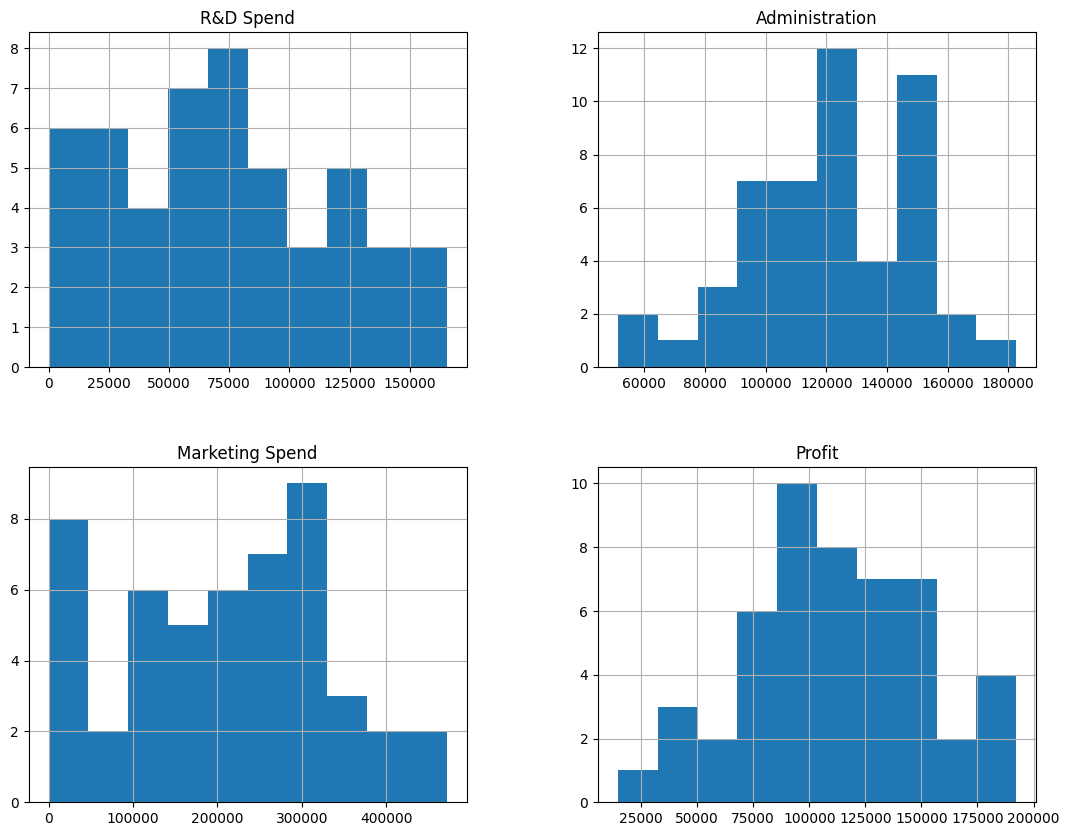

In [72]:
copy_data.hist(figsize = (13, 10))
plt.show()

In [73]:
copy_data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [74]:
copy_data_state = pd.get_dummies(copy_data['State'], dtype=int, prefix = 'state')
copy_data_state

,state_California,state_Florida,state_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [75]:
copy_data_dummies = pd.concat([copy_data, copy_data_state], axis=1)
copy_data_dummies

,R&D Spend,Administration,Marketing Spend,State,Profit,state_California,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [81]:
x = copy_data_dummies.drop(['Profit', 'state_New York', 'State'], axis = 1)
y = copy_data_dummies['Profit']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [83]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [84]:
y_pred = model.predict(x_test)
y_pred

array([126362.87908254,  84608.45383635,  99677.49425148,  46357.46068582,
       128750.48288503,  50912.41741885, 109741.35032702, 100643.24281646,
        97599.27574595, 113097.42524433])

In [95]:
pd.DataFrame({'y_pred' : y_pred, 'y_test' : y_test, 'diff' : y_pred - y_test})

,y_pred,y_test,diff
13,126362.879083,134307.35,-7944.470917
39,84608.453836,81005.76,3602.693836
30,99677.494251,99937.59,-260.095749
45,46357.460686,64926.08,-18568.619314
17,128750.482885,125370.37,3380.112885
48,50912.417419,35673.41,15239.007419
26,109741.350327,105733.54,4007.810327
25,100643.242816,107404.34,-6761.097184
32,97599.275746,97427.84,171.435746
19,113097.425244,122776.86,-9679.434756


In [96]:
MSE = mean_squared_error(y_pred, y_test)
MSE

82010363.04443319

In [103]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(9055.957323465764)

In [106]:
model.score(x_train, y_train)

0.9537019995248526

In [102]:
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2:.2f} %')

R2 score: 0.90 %


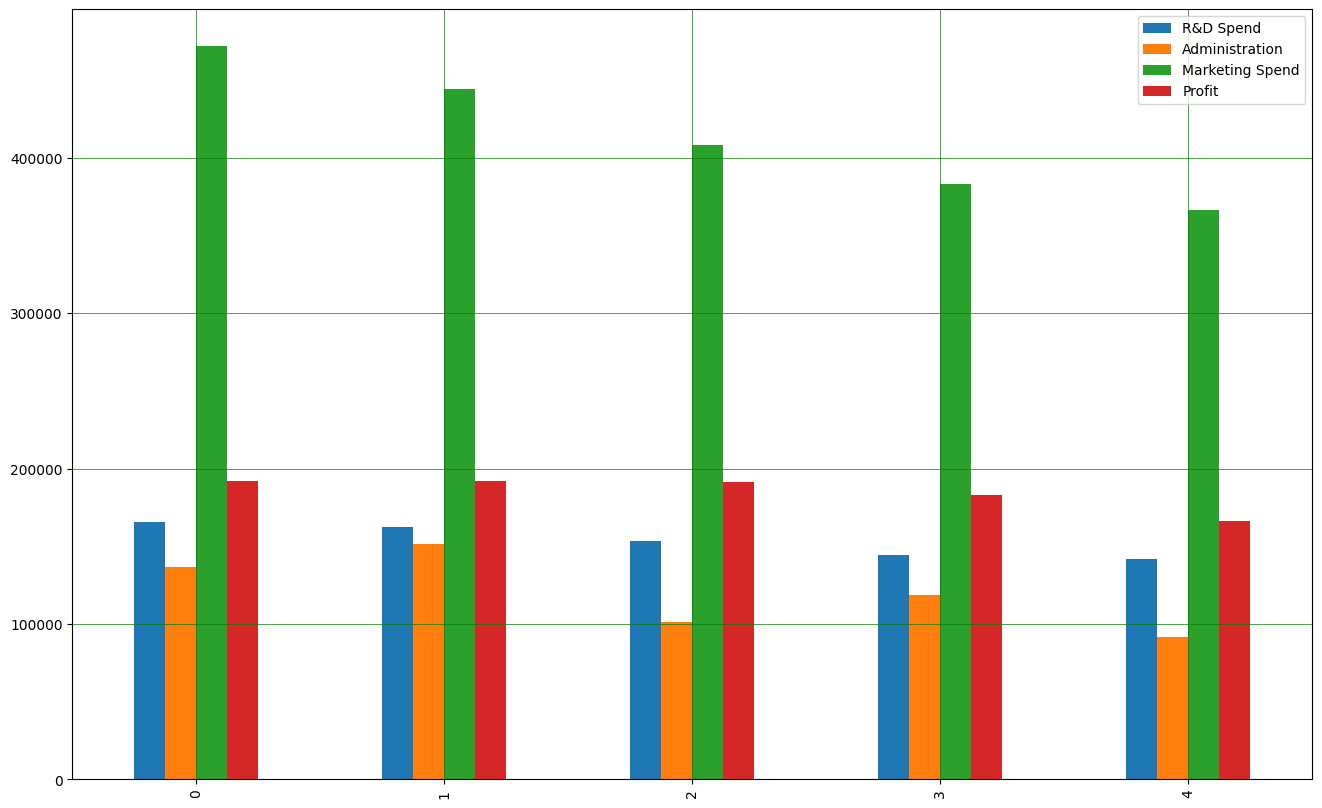

In [111]:
df1 = copy_data.head()
df1.plot(kind='bar', figsize = (16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [113]:
print('Intercept of the model:\n', model.intercept_)
print("="*50)
print('Coefficient of the line:\n', model.coef_)

Intercept of the model:
 54035.02735368936
Coefficient of the line:
 [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02 -6.98775997e+00
  9.31805246e+02]


In [114]:
import statsmodels.api as sm
stmodel = sm.OLS(y, x).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              735.7
Date:                Wed, 27 Aug 2025   Prob (F-statistic):                    6.07e-42
Time:                        08:03:07   Log-Likelihood:                         -544.86
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1109.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7308      0.066     11.072      0.000       0.598       0.864
Administration       0.3021      0.037      8.174      0.000       0.228       0.377
Marketing Spend      0.0776      0.023      3.397      0.001       0.032       0.124
state_California  6019.9282   4596.090      1.310      0.197   -3237.072    1.53e+04
state_Florida     3814.3461   4819.854      0.791      0.433   -5893.338    1.35e+04
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.071
Skew:                          -0.015   Prob(JB):                        0.965
Kurtosis:                       2.817   Cond. No.                     8.14e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
x = sm.add_constant(x)
modle = sm.OLS(y, x).fit()
modle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           1.34e-27
Time:                        08:11:48   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
state_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
state_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""